

# **Using Pre-trained Models in Keras to get Rank-1 and Rank-5 Accuracy**
1. We'll first load the pre-trained ImageNet model MobileNetV2
2. We'll get the top 5 classes from a single image inference
3. Next we'll construct a function to give us the rank-N Accuracy using a few test images

---


In [102]:

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [103]:
# ! unzip /content/images.zip

In [104]:
# ! rm -f /content/images/class1/.DS_Store

In [105]:
import cv2
from os import listdir
from os.path import isfile, join

mypath="/content/images/class1"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['doormate.jpg',
 'long-haired-collie-5766447_1280.jpg',
 'limo-safety-ftr.jpg',
 'spiderweb_1050x700.jpg',
 'Basketball_(Ball).jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'beer glass.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'burrito.jpg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Predictions for doormate.jpg:
 - solar_dish: 0.4522
 - cleaver: 0.1429
 - pencil_box: 0.0905
 - Windsor_tie: 0.0571
 - handkerchief: 0.0328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

Predictions for long-haired-collie-5766447_1280.jpg:
 - West_Highland_white_terrier: 0.1927
 - Samoyed: 0.0505
 - teddy: 0.0311
 - chow: 0.0202
 - spotlight: 0.0181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Predictions for limo-safety-ftr.jpg:
 - limousine: 0.0668
 - pickup: 0.0428
 - trailer_truck: 0.0426
 - cab: 0.0308
 - recreational_vehicle: 0.0219
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Predictions for spiderweb_1050x700.jpg:
 - spider_web: 0.4445
 - peacock: 0.0724
 - pinwheel: 0.0190
 - knot: 0.0135
 - Windsor_tie: 0.0107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Predictions for Basketball_(Ball).jpg:
 - croquet_ball: 0.3519
 - basketball: 0.0661
 - Petri_dish: 0.0351
 - ski_mask: 0.0336
 - shield: 0.0268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Predictions for German_Shepher

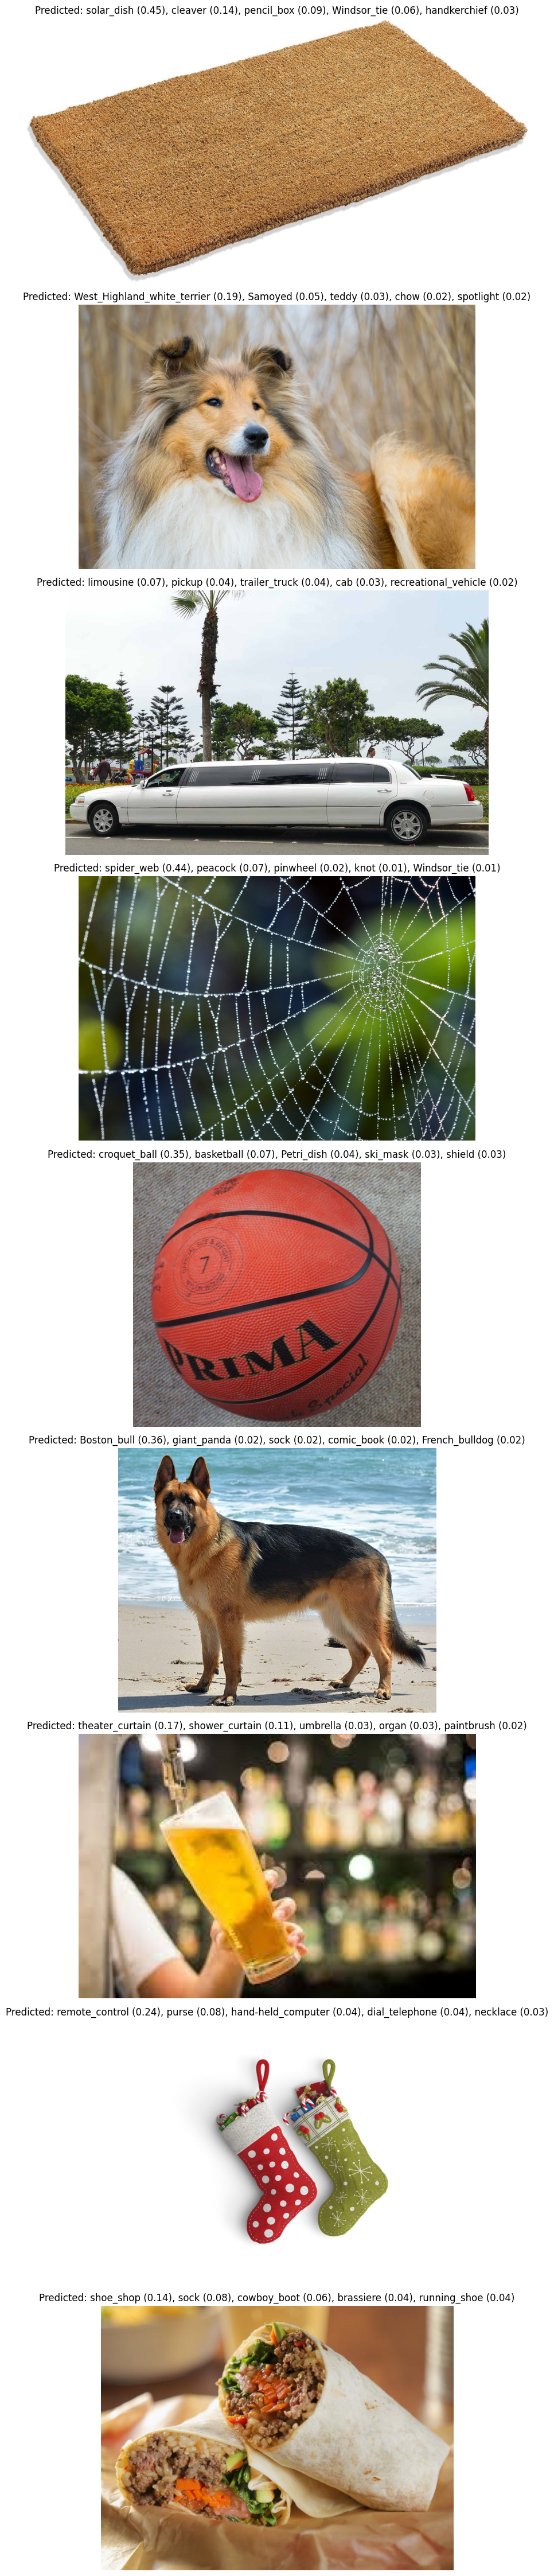

In [106]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

# Initialize figure
fig, axes = plt.subplots(len(file_names), 1, figsize=(10, 5 * len(file_names)))
if len(file_names) == 1:
    axes = [axes]  # Ensure it works even if there's only one image

all_top_classes = []

# Loop through images and run them through classifier
for i, file in enumerate(file_names):
    img_path = os.path.join(mypath, file)

    # Load image using Keras
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Load image using OpenCV
    img2 = cv2.imread(img_path)
    if img2 is None:
        print(f"Error: Could not read image {img_path}")
        continue  # Skip this iteration if the image fails to load

    # Get Predictions
    preds = model.predict(x)
    predictions = decode_predictions(preds, top=5)[0]  # Use top-5 predictions
    all_top_classes.append(predictions)  # Store predictions

    # Print all predictions with probabilities
    print(f"\nPredictions for {file}:")
    for class_id, class_name, probability in predictions:
        print(f" - {class_name}: {probability:.4f}")

    # Plot image with predictions
    top_classes = [f"{p[1]} ({p[2]:.2f})" for p in predictions]  # Format as "label (probability)"
    axes[i].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Predicted: {', '.join(top_classes)}")  # Show all predictions
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [107]:
print(f"Predictions : {predictions}")
print("#"*150)
print(f"All Top Class : {all_top_classes}")

Predictions : [('n04200800', 'shoe_shop', 0.14357315), ('n04254777', 'sock', 0.08293756), ('n03124043', 'cowboy_boot', 0.059259295), ('n02892767', 'brassiere', 0.042909566), ('n04120489', 'running_shoe', 0.035835758)]
######################################################################################################################################################
All Top Class : [[('n04258138', 'solar_dish', 0.4521856), ('n03041632', 'cleaver', 0.14287828), ('n03908618', 'pencil_box', 0.090511754), ('n04591157', 'Windsor_tie', 0.05708962), ('n03485794', 'handkerchief', 0.0327757)], [('n02098286', 'West_Highland_white_terrier', 0.1926826), ('n02111889', 'Samoyed', 0.050523467), ('n04399382', 'teddy', 0.031071676), ('n02112137', 'chow', 0.02015655), ('n04286575', 'spotlight', 0.01813287)], [('n03670208', 'limousine', 0.066794485), ('n03930630', 'pickup', 0.042807214), ('n04467665', 'trailer_truck', 0.04262223), ('n02930766', 'cab', 0.030819885), ('n04065272', 'recreational_vehicle', 0

In [108]:
directory="/content/images/class1"

print(os.listdir(directory))

['doormate.jpg', 'long-haired-collie-5766447_1280.jpg', 'limo-safety-ftr.jpg', 'spiderweb_1050x700.jpg', 'Basketball_(Ball).jpg', 'German_Shepherd_-_DSC_0346_(10096362833).jpg', 'beer glass.jpg', 'christmas-stockings-3006869_1280.jpg', 'burrito.jpg', '.ipynb_checkpoints']


In [109]:
ground_truth = [
    'doormat, welcome mat',
    'collie',
    'limousine, limo',
    'spider web, spider\'s web',  # Matches spiderweb_1050x700.jpg
    'basketball',
    'german shepherd, german shepherd dog, german police dog, alsatian',
    'beer glass',
    'christmas stocking',
    'burrito'
]


In [110]:
def getScore(all_top_classes, ground_truth, N):
    # Normalize ground truth labels (replace spaces with underscores and convert to lowercase)
    ground_truth = [label.replace(" ", "_").lower() for label in ground_truth]

    # Calculate rank-N score
    in_labels = 0
    for i, labels in enumerate(all_top_classes):
        # Normalize predicted labels (access label in tuple and normalize)
        normalized_labels = [label[1].replace(" ", "_").lower() for label in labels]

        # Check if the ground truth label exists in the top-N predictions
        if ground_truth[i] in normalized_labels[:N]:
            in_labels += 1

    # Calculate and return the rank-N accuracy
    accuracy = (in_labels / len(all_top_classes)) * 100
    return f'Rank-{N} Accuracy = {accuracy:.2f}%'


# get rank 5 Accuracy

In [111]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 11.11%'

# Get Rank 1 Accuracy

In [112]:
getScore(all_top_classes, ground_truth, 1)

'Rank-1 Accuracy = 0.00%'

# Get Rank 10 Accuracy

In [113]:
getScore(all_top_classes, ground_truth, 10)

'Rank-10 Accuracy = 11.11%'